# pytorch

## Quick Start

### Tensor

In [103]:
import torch

In [110]:
# 与Numpy非常类似
a = torch.tensor([1,2,3])
print(a)
print(type(a),'\n')

a = torch.linspace(-1,1,10)
print(a,'\n')

a = torch.randn((1,2))
print(a)

tensor([1, 2, 3])
<class 'torch.Tensor'> 

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000]) 

tensor([[0.4635, 0.1546]])


In [112]:
# 但是Tensor运算可以放在GPU上执行，利用GPU的并行计算加速
a = torch.tensor([1,2]).cuda()  # 无GPU环境无法执行
b = torch.tensor([3,4]).cuda()
print(a+b)

In [115]:
# pytorch提供梯度的自动计算
# 梯度即为导数在高维度上的推广
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)
c = 3 * a **2 -b # 数学计算表达式
c.backward() # 反向传播
print(a.grad)
print(b.grad)
print(c)

tensor([6.])
tensor([-1.])
tensor([1.], grad_fn=<SubBackward0>)


## 基本数据操作

### 创建tensor常用函数:
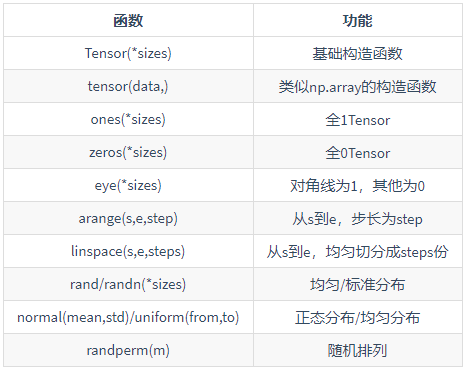

In [18]:
x = torch.rand(3, 3) # 随机tensor ,empty为空tensor
print(x,'\n')

# 加法 : 通过shape或者size()来获取Tensor的形状
print(x.size())
print(x.shape,'\n')

# tensor加法1
y = torch.rand(3, 3)
print(x + y,'\n')
#２
print(torch.add(x, y))
# 3
result = torch.empty(3, 3)
torch.add(x, y, out=result)
print(result,'\n')
# adds x to y
y.add_(x)
print(y,'\n')

# 索引:出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改。
y = x[0, :]
y += 1
print(y)
print(x) # 源tensor也被改了

tensor([[0.1280, 0.9140, 0.2362],
        [0.7549, 0.0129, 0.8860],
        [0.8064, 0.5097, 0.3776]]) 

torch.Size([3, 3])
torch.Size([3, 3]) 

tensor([[0.6338, 1.3350, 0.2872],
        [1.6056, 0.7565, 1.4680],
        [1.2618, 1.3449, 0.7193]]) 

tensor([[0.6338, 1.3350, 0.2872],
        [1.6056, 0.7565, 1.4680],
        [1.2618, 1.3449, 0.7193]])
tensor([[0.6338, 1.3350, 0.2872],
        [1.6056, 0.7565, 1.4680],
        [1.2618, 1.3449, 0.7193]]) 

tensor([[0.6338, 1.3350, 0.2872],
        [1.6056, 0.7565, 1.4680],
        [1.2618, 1.3449, 0.7193]]) 

tensor([1.1280, 1.9140, 1.2362])
tensor([[1.1280, 1.9140, 1.2362],
        [0.7549, 0.0129, 0.8860],
        [0.8064, 0.5097, 0.3776]])


索引: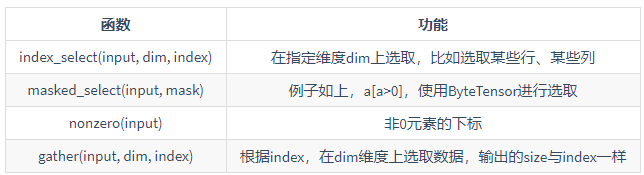

In [28]:
# 改变形状 view()
x = torch.rand(5,3)
print(x)
y = x.view(-1) # -1为自动计算铺成向量需要多少维度
print(y)
z = x.view(-1,5)
print(z,'\n')

# view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。
# 顾名思义，view仅仅是改变了对这个张量的观察角度，内部数据并未改变

# 如果我们想返回一个真正新的副本（即不共享data内存）该怎么办,Pytorch还提供了一个reshape()可以改变形状,但是此函数并不能保证返回的是其拷贝，所以不推荐使用。推
# 荐先用clone创造一个副本然后再使用view
x_cp = x.clone().view(15) # 重点 使用clone还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源Tensor。
x -= 1
print(x)
print(x_cp)

tensor([[0.2306, 0.4951, 0.4596],
        [0.7930, 0.9048, 0.3011],
        [0.7812, 0.5986, 0.6456],
        [0.8169, 0.4353, 0.4343],
        [0.2285, 0.5030, 0.6202]])
tensor([0.2306, 0.4951, 0.4596, 0.7930, 0.9048, 0.3011, 0.7812, 0.5986, 0.6456,
        0.8169, 0.4353, 0.4343, 0.2285, 0.5030, 0.6202])
tensor([[0.2306, 0.4951, 0.4596, 0.7930, 0.9048],
        [0.3011, 0.7812, 0.5986, 0.6456, 0.8169],
        [0.4353, 0.4343, 0.2285, 0.5030, 0.6202]]) 

tensor([[-0.7694, -0.5049, -0.5404],
        [-0.2070, -0.0952, -0.6989],
        [-0.2188, -0.4014, -0.3544],
        [-0.1831, -0.5647, -0.5657],
        [-0.7715, -0.4970, -0.3798]])
tensor([0.2306, 0.4951, 0.4596, 0.7930, 0.9048, 0.3011, 0.7812, 0.5986, 0.6456,
        0.8169, 0.4353, 0.4343, 0.2285, 0.5030, 0.6202])


In [31]:
# 常用的函数就是item(), 它可以将一个标量Tensor转换成一个Python number：
x = torch.randn(1) # only one element tensors can be converted to Python scalars
print(x)
print(x.item())

tensor([-0.7363])
-0.7363184094429016


### 内置的线性代数函数:PyTorch中的Tensor支持超过一百种操作，包括转置、索引、切片、数学运算、线性代数、随机数等等，可参考官方文档。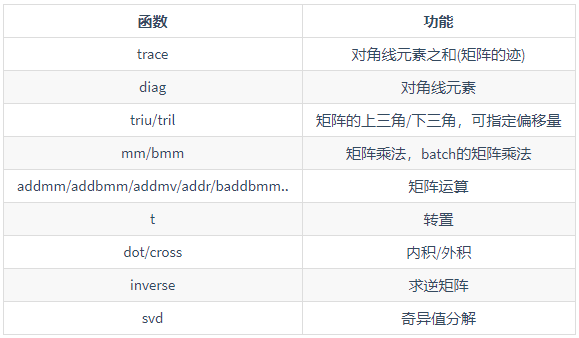

### 广播机制 : 

In [33]:
# 前面我们看到如何对两个形状相同的Tensor做按元素运算。当对两个形状不同的Tensor按元素运算时，
# 可能会触发广播（broadcasting）机制：先适当复制元素使这两个Tensor形状相同后再按元素运算.
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)
# 由于x和y分别是1行2列和3行1列的矩阵，如果要计算x + y，那么x中第一行的2个元素被广播（复制）到了第二行和第三行，
# 而y中第一列的3个元素被广播（复制）到了第二列。如此，就可以对2个3行2列的矩阵按元素相加。

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 运算的内存开销 :

In [36]:
# 索引操作是不会开辟新内存的，而像y = x + y这样的运算是会新开内存的，然后将y指向新内存。
# 为了演示这一点，我们可以使用Python自带的id函数：如果两个实例的ID一致，那么它们所对应的内存地址相同；反之则不同。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x
print(id(y) == id_before) # False 

# 如果想指定结果到原来的y的内存，我们可以使用前面介绍的索引来进行替换操作。
# 在下面的例子中，我们把x + y的结果通过[:]写进y对应的内存中。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before) # True

# 我们还可以使用运算符全名函数中的out参数或者自加运算符+=(也即add_())达到上述效果，
# 例如torch.add(x, y, out=y)和y += x(y.add_(x))。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
print(id(y) == id_before) # True

False
True
True


### Tensor和NumPy相互转换

In [ ]:
# Tensor转NumPy : numpy()将Tensor转换成NumPy数组
a = torch.ones(5)
b = a.numpy()
print(a, b)

# NumPy数组转Tensor : from_numpy()将NumPy数组转换成Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)
# 这两个函数所产生的的Tensor和NumPy中的数组共享相同的内存（所以他们之间的转换很快），改变其中一个时另一个也会改变

# 有一个常用的方法就是直接用torch.tensor()将NumPy数组转换成Tensor，需要注意的是该方法总是会进行数据拷贝，
# 返回的Tensor和原来的数据不再共享内存
c = torch.tensor(a)
a += 1
print(a, c)

### Tensor on GPU : 用方法to()可以将Tensor在CPU和GPU（需要硬件支持）之间相互移动。

In [34]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

## autograd

In [38]:
# 创建一个Tensor并设置requires_grad=True
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn) # x是直接创建的，所以它没有grad_fn, x这种直接创建的称为叶子节点，叶子节点对应的grad_fn是None。

# 运算操作
y = x + 2
print(y)
print(y.grad_fn) #  而y是通过一个加法操作创建的，所以它有一个为<AddBackward>的grad_fn。

z = y * y * 3
out = z.mean()
print(z, out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [39]:
#因为out是一个标量，所以调用backward()时不需要指定求导变量：
out.backward() # 等价于 out.backward(torch.tensor(1.))
#我们来看看out关于x的梯度 d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## 线性回归Linear regression

### 矢量计算表达式 

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法

In [43]:
# 先定义两个1000维的向量
from time import time
a = torch.ones(1000)
b = torch.ones(1000)

# 向量相加的一种方法是，将这两个向量按元素逐一做标量加法。
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

#向量相加的另一种方法是，将这两个向量直接做矢量加法。
start = time()
d = a + b
print(time() - start)

#结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

0.019001245498657227
0.0


### 线性回归的从零开始实现

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
# 1.生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(features[0], labels[0])

tensor([-0.2100,  1.4248]) tensor(-1.0544)


# tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [4]:
# 定义模型:最常见的模型类型是层的堆叠：tf.keras.Sequential 模型
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

tf.keras.layers中网络配置：

activation：设置层的激活函数。此参数由内置函数的名称指定，或指定为可调用对象。默认情况下，系统不会应用任何激活函数。

kernel_initializer 和 bias_initializer：创建层权重（核和偏差）的初始化方案。此参数是一个名称或可调用对象，默认为 "Glorot uniform" 初始化器。

kernel_regularizer 和 bias_regularizer：应用层权重（核和偏差）的正则化方案，例如 L1 或 L2 正则化。默认情况下，系统不会应用正则化函数。

In [7]:
# 定义网络配置
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal)
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [8]:
# 定义训练流程
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [9]:
# 输入随机数据
import numpy as np

train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))

model.fit(train_x, train_y, epochs=10, batch_size=100,
          validation_data=(val_x, val_y))

Epoch 1/10
10/10 [==============================] - 1s 13ms/step - loss: 11.6436 - categorical_accuracy: 0.0946 - val_loss: 11.8818 - val_categorical_accuracy: 0.1100
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 11.7165 - categorical_accuracy: 0.0994 - val_loss: 12.3005 - val_categorical_accuracy: 0.1200
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 12.3261 - categorical_accuracy: 0.1033 - val_loss: 13.4790 - val_categorical_accuracy: 0.1250
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 13.8309 - categorical_accuracy: 0.1078 - val_loss: 15.9812 - val_categorical_accuracy: 0.1350
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 16.5304 - categorical_accuracy: 0.0881 - val_loss: 20.0478 - val_categorical_accuracy: 0.1300
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 20.8052 - categorical_accuracy: 0.0922 - val_loss: 24.3874 - val_categorical_accuracy: 0.1300
Epo

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(32)
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset, validation_steps=3)

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 56.5547 - categorical_accuracy: 0.0896 - val_loss: 71.8745 - val_categorical_accuracy: 0.1250
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 88.1089 - categorical_accuracy: 0.0887 - val_loss: 109.9744 - val_categorical_accuracy: 0.1354
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 131.6498 - categorical_accuracy: 0.0929 - val_loss: 159.9969 - val_categorical_accuracy: 0.1146
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 185.8225 - categorical_accuracy: 0.0865 - val_loss: 223.1514 - val_categorical_accuracy: 0.1562
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 252.4593 - categorical_accuracy: 0.0897 - val_loss: 294.2376 - val_categorical_accuracy: 0.1250
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 325.6284 - categorical_accuracy: 0.1122 - val_loss: 369.7544 - val_categorical_accuracy: 0.

In [11]:
test_x = np.random.random((1000, 72))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_data = test_data.batch(32).repeat()
model.evaluate(test_data, steps=30)
# predict
result = model.predict(test_x, batch_size=32)
print(result)

30/30 [==============================] - 0s 655us/step - loss: 681.5824 - categorical_accuracy: 0.0969
[[9.2274018e-29 2.7944267e-01 1.5133801e-01 ... 0.0000000e+00
  1.1262973e-01 3.0674075e-21]
 [3.2385137e-32 3.5925537e-01 1.1841202e-01 ... 0.0000000e+00
  1.6895610e-01 1.2892940e-23]
 [2.1092583e-27 3.4842908e-01 7.5426698e-02 ... 0.0000000e+00
  1.7830808e-01 2.6022218e-20]
 ...
 [3.4721602e-26 3.4495890e-01 1.3475844e-01 ... 0.0000000e+00
  1.4699490e-01 1.7198010e-19]
 [3.3191037e-29 2.8259248e-01 1.1785960e-01 ... 0.0000000e+00
  1.6483472e-01 1.2041241e-21]
 [3.4608781e-32 4.4340533e-01 4.5186251e-02 ... 0.0000000e+00
  1.4486931e-01 1.1212542e-23]]


# keras

In [4]:
# A Basci Example
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))
model = Sequential()
model.add(Dense(32,
               activation='relu',
               input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(data,labels,epochs=10,batch_size=32)
predictions = model.predict(data)

Epoch 1/10
32/32 [==============================] - 0s 839us/step - loss: 0.7004 - accuracy: 0.5313
Epoch 2/10
32/32 [==============================] - 0s 710us/step - loss: 0.6914 - accuracy: 0.5207
Epoch 3/10
32/32 [==============================] - 0s 806us/step - loss: 0.6843 - accuracy: 0.5610
Epoch 4/10
32/32 [==============================] - 0s 968us/step - loss: 0.6830 - accuracy: 0.5525
Epoch 5/10
32/32 [==============================] - 0s 968us/step - loss: 0.6791 - accuracy: 0.5711
Epoch 6/10
32/32 [==============================] - 0s 871us/step - loss: 0.6785 - accuracy: 0.5718
Epoch 7/10
32/32 [==============================] - 0s 839us/step - loss: 0.6658 - accuracy: 0.6042
Epoch 8/10
32/32 [==============================] - 0s 774us/step - loss: 0.6663 - accuracy: 0.6003
Epoch 9/10
32/32 [==============================] - 0s 903us/step - loss: 0.6666 - accuracy: 0.5972
Epoch 10/10
32/32 [==============================] - 0s 806us/step - loss: 0.6629 - accuracy: 0.6080

# numpy

Numpy的基本数据结构和操作方法
       
       Numpy实际上是现在Python直接自带的一个库，毕竟矩阵运算是非常复杂的，如果将矩阵运算函数都自己手写会直接累死，并且python数据量多的情况下是很慢的，但是Numpy底层直接用C实现，达到了加速的效果，基本上Python在处理数据的时候几乎就是调用Numpy中的类型和方法。我们在做机器学习的时候必然会涉及到数据的整理、简单预处理、格式化等等问题，因此这些内容也得事先有所了解。当然，快速入门肯定不用一下子把Numpy的教程看完。但最起码的，Numpy中有哪些数据结构，这些数据结构的基本操作（加减乘除、排序、查找、矩阵的计算等）得要事先熟悉一遍。
       
推荐读物： 《从Python到Numpy》
www.labri.fr/perso/nrougier/from-python-to-numpy

## Quick Start

### 基本创建

In [2]:
import numpy as np
# Creating Arrays
a = np.array([1,2,3])
print(a,'\n')
b = np.array([(1.5,2,3),(4,5,6)])
print(b,'\n')
c = np.array([[(1.5,2,3),(4,5,6)],[(3,2,1),(4,5,6)]],dtype = float)
print(c)

[1 2 3] 

[[1.5 2.  3. ]
 [4.  5.  6. ]] 

[[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]


In [4]:
a = np.zeros((3,2)) # 输出全为0或1的数组
print(a)
print(a.shape,'\n') # shape输出 （行数，列数）

a = np.ones((2,4))
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
(3, 2) 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [5]:
a = np.arange(1,10) # 输出指定范围的数组
print(a)

[1 2 3 4 5 6 7 8 9]


In [7]:
a = np.linspace(0,1,5) # (范围1，范围2，输出个数)
print(a)

[0.   0.25 0.5  0.75 1.  ]


In [11]:
a = np.random.rand(2,4)
print(a)
print(type(a))
print(a.dtype) # 默认为64位浮点型

[[0.26301404 0.42276384 0.35914923 0.55876941]
 [0.77942788 0.1816015  0.81914411 0.32634007]]
<class 'numpy.ndarray'>
float64


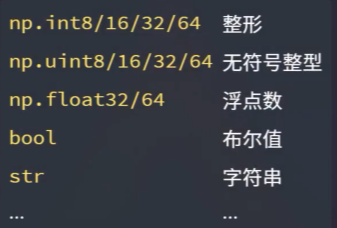

In [13]:
a = np.ones((2,4),dtype=np.int32) # 指定数据类型
print(a)

[[1 1 1 1]
 [1 1 1 1]]


In [19]:
a = np.ones((2,4)) # 更改数据类型
print(a)
print(a.dtype)
print()
b = a.astype(int)
print(b)
print(b.dtype)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
float64

[[1 1 1 1]
 [1 1 1 1]]
int32


### 基本运算

In [23]:
from dis import dis
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a+b)  # 尺寸相同时直接四则运算，对应位置的元素相加减
print(a/b)

print(np.dot(a,b)) # 向量的点积运算

[5 7 9]
[0.25 0.4  0.5 ]
32


In [27]:
a = np.array([[1,2],[3,4]])
b = np.array([[2,0],[0,2]])
print(a@b)  # 进行矩阵的乘法运算， 等同于 np.matmul()

[[2 4]
 [6 8]]


In [37]:
a = np.array([1,2,3])
print(a * 5,'\n') # 直接与数运算，每个元素都会运算，叫做广播Broadcasting

# 不同尺寸的数组也可以直接做运算,numpy自动将两个数组扩展至相同的尺寸，然后相同位置的元素运算
a = np.array([[1],[10],[20]])
b = np.array([0,1,2])
'''扩充成 
1  1  1
10 10 10
20 20 20
和
0 1 2
0 1 2
0 1 2
'''
print(a+b)

[ 5 10 15] 

[[ 1  2  3]
 [10 11 12]
 [20 21 22]]


In [31]:
a = np.array([1,2,3])
print(np.sqrt(a)) # 对每个数依次求平方根
print(np.sin(a)) # 对每个数依次求sin
print(np.cos(a)) # 对每个数依次求cos
print(np.log(a)) # 对每个数依次做对数运算
print(np.power(a,2)) # 对每个数依次做指数运算

[1.         1.41421356 1.73205081]
[0.84147098 0.90929743 0.14112001]
[ 0.54030231 -0.41614684 -0.9899925 ]
[0.         0.69314718 1.09861229]
[1 4 9]


In [45]:
# 通过min max返回最小或者最大值
a = np.array([1,2,3,4,5])
print(a)
print('min :',a.min())
print('max :',a.max())
# argmin 和 argmax返回 最小或者最大值所在的索引
print('argmin :',a.argmin())
print('argmax :',a.argmax())
# sum返回所有数据的总和
print('sum :',a.sum())
print('mean :',a.mean())  # 返回平均值
print('median :',np.median(a))  # 返回中位数
print('var :',a.var()) # 返回数据方差
print('std :',a.std()) # 返回数据标准方差

[1 2 3 4 5]
min : 1
max : 5
argmin : 0
argmax : 4
sum : 15
mean : 3.0
median : 3.0
var : 2.0
std : 1.4142135623730951


In [48]:
# 当数据为高维的时候可以指定axis
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print('sum :',a.sum(axis=0)) # 当axis = 0 时候，代表第一个维度即为↓列，它会将每一列↓中对应的数据相加
print('sum :',a.sum(axis=1)) # 当axis = 1 时候，代表第一个维度即为行→，它会将每一行→中对应的数据相加

sum : [ 6  8 10 12 14]
sum : [15 35]


### 取数操作

In [55]:
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print(a[0,1]) # 按位置取数
print(a[a>3]) # 条件筛选，返回一个一维ndarray
print(a[(a>3)&(a%2 ==0 )]) # 复合筛选 &与 |或
print(a[(a>3)|(a%2 ==0 )])

2
[4 5 5 6 7 8 9]
[4 6 8]
[2 4 5 5 6 7 8 9]


In [65]:
# 切片语法
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print(a[0, 0:2]) # 获取第一行但是1-2列的所有数据
print(a[0, :]) # 获取第一行但是所有列的所有数据
print(a[0],'\n') # 获取第一行但是所有列的所有数据

a = np.array([1,2,3,4,5,6,7,8,9])
print(a[0:9:2]) # 第二个冒号后面为跨度，此时跨度为2，每隔两个数取一个数
print(a[4:1:-2]) # 跨度取负数
print()
print(a[::-1]) # 经常数用的写法：翻转数组

[1 2]
[1 2 3 4 5]
[1 2 3 4 5] 

[1 3 5 7 9]
[5 3]

[9 8 7 6 5 4 3 2 1]


### 例子1：image processing

In [91]:
from PIL import Image
im = Image.open('xfan_headphoto.jpg')
# im.show()
im = np.array(im)
print(im.shape) # 525行 374列 3个颜色分量
print(im[100,100])
print(im.dtype)

im_downsample = im[::10,::10,:] # 对图片进行降采样
# Image.fromarray(im_downsample).show()

im_flipped = im[::-1,:,:] # 对图片进行反转
# Image.fromarray(im_flipped).show()

im_cropped = im[40:500,50:350,:]  # 对图片进行切片
Image.fromarray(im_cropped).show()

(525, 374, 3)
[40 39 35]
uint8


In [75]:
# 单独提取红色分量
im_r = im[:,:,0]
Image.fromarray(im_r).show()

In [80]:
# 两张图片按比例混一起
im1 = np.array(Image.open('xfan_headphoto.jpg'))
im1 = im1[0:449,0:319,:]
im2 = np.array(Image.open('xfan_workphoto.jpg'))
im_blend = im1 * 0.4 + im2 * 0.6 # 此时运算的结果时浮点数
im_blend = im_blend.astype(np.uint8)
Image.fromarray(im_blend).show()

In [86]:
# 生成图片
a = np.random.rand(200,200,3)
a = a.astype(np.uint8)
Image.fromarray(a).show()

### numpy - I/O

In [95]:
from PIL import Image
im = Image.open('xfan_headphoto.jpg')
im = np.array(im)

im_flipped = im[:,::-1,:] # 对图片进行反转
# Image.fromarray(im_flipped).show()

im_downsample = im[::3,::3,:] # 对图片进行降采样
# Image.fromarray(im_downsample).show()

In [96]:
np.save('downsample_xfphoto',im_downsample)
np.save('flip_xfphoto',im_flipped)

## numpy学习

### ndarray
    ndarray 对象是用于存放同类型元素的多维数组。
    ndarray 中的每个元素在内存中都有相同存储大小的区域。
 
ndarray 内部由以下内容组成：

    一个指向数据（内存或内存映射文件中的一块数据）的指针。
    数据类型或 dtype，描述在数组中的固定大小值的格子。
    一个表示数组形状（shape）的元组，表示各维度大小的元组。
    一个跨度元组（stride），其中的整数指的是为了前进到当前维度下一个元素需要"跨过"的字节数。
    
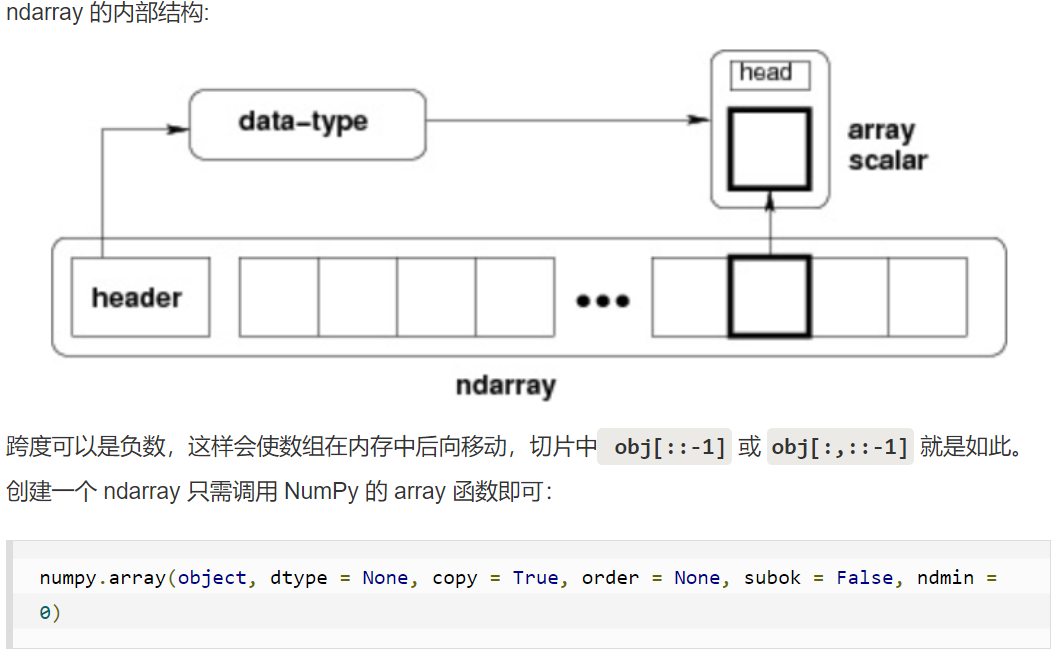
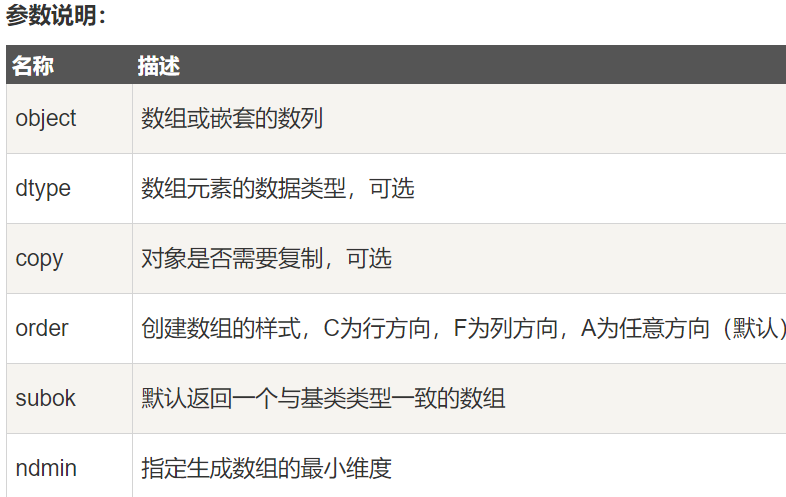

In [1]:
import numpy as np
a = np.array([1,2,3])
print(a)

[1 2 3]


In [4]:
# 多于一个维度
import numpy as np
a = np.array([[1,2],[3,4]])
print(a)

[[1 2]
 [3 4]]


In [5]:
# 最小维度  
import numpy as np 
a = np.array([1,  2,  3,4,5], ndmin =  2)  
print (a)

[[1 2 3 4 5]]


In [6]:
# dtype 参数  
import numpy as np 
a = np.array([1,  2,  3], dtype = complex)  
print (a)

[1.+0.j 2.+0.j 3.+0.j]


ndarray 对象由计算机内存的连续一维部分组成，并结合索引模式，将每个元素映射到内存块中的一个位置。内存块以行顺序(C样式)或列顺序(FORTRAN或MatLab风格，即前述的F样式)来保存元素。

### 数据类型对象 (dtype)

数据类型对象（numpy.dtype 类的实例）用来描述与数组对应的内存区域是如何使用，它描述了数据的以下几个方面：：

    数据的类型（整数，浮点数或者 Python 对象）
    数据的大小（例如， 整数使用多少个字节存储）
    数据的字节顺序（小端法或大端法）
    在结构化类型的情况下，字段的名称、每个字段的数据类型和每个字段所取的内存块的部分
    如果数据类型是子数组，那么它的形状和数据类型是什么。
字节顺序是通过对数据类型预先设定 < 或 > 来决定的。 < 意味着小端法(最小值存储在最小的地址，即低位组放在最前面)。> 意味着大端法(最重要的字节存储在最小的地址，即高位组放在最前面)。

dtype 对象是使用以下语法构造的：

# pandas

Pandas - 读写数据的利器
        
     当然也要强调一点Pandas并不是读写数据唯一的方法。只不过直接用Python自带的方法来做太过繁琐，而其它的库虽然也有，但目前能像Pandas一样既完整又好用的也不是太多。举个例子，比如我们要读一个csv文件中的数据，用Pandas也就一句data = pandas.read_csv('data.csv')就行了。查询整理数据更是有类似SQL一样的机制。那么这个工具很显然能给我们提供极大的便利。

# sklearn

sklearn全称 scikit-learn，它是一个集成了目前市面上最常用的机器学习模型的库，使用起来非常轻松简单，因此获得了广泛的应用。

从官网显示数据来看，这个项目始于2007年，工具箱在2011年正式发布，并且在机器学习顶级杂志 Journal of Machine Learning Research 发表了对应的论文。能在JMLR上发文章就已经能说明该工具箱的水平不一般。论文全文可以直接在官网免费下载。

sklearn真是太强大了，里面分装了绝大部分我们常见的机器学习算法，熟悉这些算法的用法，可以让我们省去重复造轮子的时间，把更多的精力面对我们要解决的问题。所以，如果你不是特别的强迫症患者，还是使用自带的算法，因为这些自带的算法都是经过很多人检验，优化，兼顾速度和精度上的优点。

# matplotlib

Matplotlib - 绘图工具

    绘图这件事在任何数据处理中其实都有非常重要的作用，因为它能最直观地给我们反馈各种结果，从而加深我们对结果的理解。Matplotlib基本上能够满足我们对基本的数据结果的各种展示需求。其中的pyplot模块用法也基本和其它一些常用的语言差不多，基本上只要用过类似R、Matlab等语言画过图的，看几分钟文档就能弄明白怎么画曲线图了。